In [1]:
#import behavioural data set with merged k means cluster results from stpe 2
import pandas as pd
import numpy as np
df = pd.read_excel('final_behavioural_k.xlsx')

In [2]:
df=df.drop(columns=['Unnamed: 0'])

In [3]:
#1.Separate the target variable (Y) from the predictors (X)s
#2.Split data (test/train) 

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df.loc[:, df.columns != 'cluster'], df['cluster'], 
		test_size = 0.2, random_state=5)

# print the shapes to check everything is OK
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(7332, 12)
(1833, 12)
(7332,)
(1833,)


In [4]:
#2. fit model, Run on Training Data

from sklearn.tree import DecisionTreeClassifier as DTC

# a decision tree model with default values
dtc = DTC()
# determine after cross validation 
#{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_split': 7}

# fit the model using some training data, learn the rules 
dtc_fit = dtc.fit(X_train[['Duration','touch1','touch2','touch3','touch4','touch5','touch6','DEVICE_TYPE','Journey Length','total_interaction']], Y_train)

# generate a mean accuracy score for the predicted data
train_score = dtc.score(X_train[['Duration','touch1','touch2','touch3','touch4','touch5','touch6','DEVICE_TYPE','Journey Length','total_interaction']], Y_train)

# print the mean accuracy of testing predictions
print("Accuracy score = " + str(round(train_score, 4)))

# dtc.fit(X_test[1:]) or the variable names if its a pd df dtc.fit(X_test[['b', 'c', 'd']])

Accuracy score = 0.9742


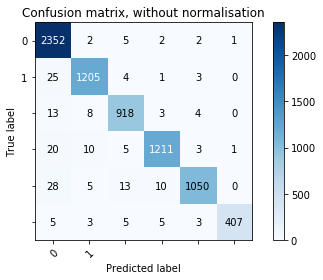

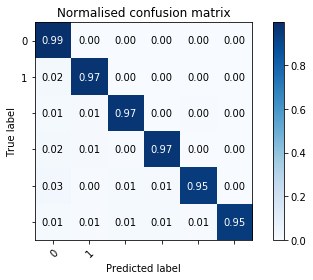

In [5]:
#4.Confusion matrix; Check the accuracy metrics (classification)

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
%matplotlib inline

np.set_printoptions(precision=2)

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalise=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          multi=False):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalise=True`.
    """
    if not title:
        if normalise:
            title = 'Normalised confusion matrix'
        else:
            title = 'Confusion matrix, without normalisation'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Only use the labels that appear in the data
    if multi==True:
    	classes = classes[unique_labels(y_true, y_pred)]
    if normalise:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor");

    fmt = '.2f' if normalise else 'd'
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

    return ax

# predict the test data - change model for whatever name you are using for the model
predicted = dtc.predict(X_train[['Duration','touch1','touch2','touch3','touch4','touch5','touch6','DEVICE_TYPE','Journey Length','total_interaction']])

# Plot non-normalised confusion matrix
plot_confusion_matrix(Y_train, predicted, classes=["0", "1"])

# Plot normalised confusion matrix
plot_confusion_matrix(Y_train, predicted, classes=["0", "1"], normalise=True)


In [6]:
#5.Tuning hyperparameters for accuracy, Optimise hyperparameters

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier as DTC

tuned_parameters = [{'criterion': ['gini', 'entropy'],
                     'max_depth': [3, 5, 7],
                     'min_samples_split': [3, 5, 7],
                     'max_features': ["sqrt", "log2", None]}]

#f1_% to predict accurately, can consider both 
scores = ['accuracy', 'f1_macro']

for score in scores:
    print("# Tuning hyperparameters for %s" % score)
    print("\n")
    clf = GridSearchCV(DTC(), tuned_parameters, cv=5,
                       scoring= score)
    clf.fit(X_train, Y_train)
    print("Best parameters set found on the training set:")
    print(clf.best_params_)
    print("\n")

# Tuning hyperparameters for accuracy


Best parameters set found on the training set:
{'criterion': 'gini', 'max_depth': 7, 'max_features': None, 'min_samples_split': 3}


# Tuning hyperparameters for f1_macro


Best parameters set found on the training set:
{'criterion': 'gini', 'max_depth': 7, 'max_features': None, 'min_samples_split': 5}




In [7]:
#6.Check the accuracy metrics again
#7.Predict the test data

predicted = dtc.predict(X_test[['Duration','touch1','touch2','touch3','touch4','touch5','touch6','DEVICE_TYPE','Journey Length','total_interaction']])

# generate a mean accuracy score for the predicted data
test_score = dtc.score(X_test[['Duration','touch1','touch2','touch3','touch4','touch5','touch6','DEVICE_TYPE','Journey Length','total_interaction']], Y_test)

# print the mean accuracy of testing predictions
print("Accuracy score = " + str(round(test_score, 4)))

Accuracy score = 0.2231


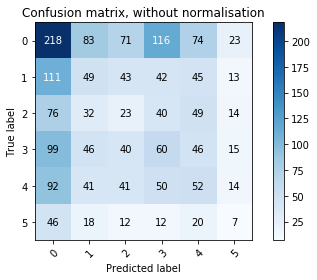

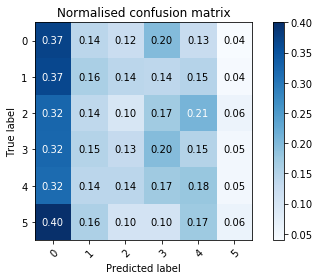

In [8]:
##6. confusion matrix; Check the accuracy metrics (classification)

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
%matplotlib inline

np.set_printoptions(precision=2)

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalise=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          multi=False):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalise=True`.
    """
    if not title:
        if normalise:
            title = 'Normalised confusion matrix'
        else:
            title = 'Confusion matrix, without normalisation'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Only use the labels that appear in the data
    if multi==True:
    	classes = classes[unique_labels(y_true, y_pred)]
    if normalise:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor");

    fmt = '.2f' if normalise else 'd'
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

    return ax

# predict the test data - change model for whatever name you are using for the model
predicted = dtc.predict(X_test[['Duration','touch1','touch2','touch3','touch4','touch5','touch6','DEVICE_TYPE','Journey Length','total_interaction']])

# Plot non-normalised confusion matrix
plot_confusion_matrix(Y_test, predicted, classes=["0","1","2","3","4","5"])

# Plot normalised confusion matrix
plot_confusion_matrix(Y_test, predicted, classes=["0","1","2","3","4","5"], normalise=True)


In [9]:
#Generate prediction results on the whole dataset 
predicted = dtc.predict(df[['Duration','touch1','touch2','touch3','touch4','touch5','touch6','DEVICE_TYPE','Journey Length','total_interaction']])


In [10]:
df['predicted_cluster']=predicted

In [11]:
df.head()

,UserID,PurchaseID,Duration,touch1,touch2,touch3,touch4,touch5,touch6,DEVICE_TYPE,Journey Length,total_interaction,cluster,predicted_cluster
0,1,3,0.000217,0.0,0.000000,1.000000,0.0,0.000000,0.000000,1.0,0.000000,0.000000,1,0
1,1,4,0.001666,1.0,0.000000,0.000000,0.0,0.000000,0.000000,1.0,0.392097,0.000588,1,0
2,1,5,0.000556,0.0,0.000000,0.504263,0.0,0.159007,0.336731,1.0,0.196049,0.000294,1,1
3,2,6,0.001505,0.0,0.866747,0.000000,0.0,0.000000,0.133253,0.0,0.284195,0.003824,3,3
4,2,7,0.000043,0.0,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.000147,3,3


In [12]:
#calculate f1 score 
from sklearn.metrics import f1_score, precision_score, recall_score
macro_prediction=dtc.predict(X_test[['Duration','touch1','touch2','touch3','touch4','touch5','touch6','DEVICE_TYPE','Journey Length','total_interaction']])
f1_score=f1_score(Y_test, macro_prediction, average='macro')
print(f1_score)

0.17795090220932497


In [13]:
#evaluate prediction results when compare with original result
def Check(df):

    if df['predicted_cluster']==df['cluster']:
        return "1"
    
    else:
        return "0"

df['dtc_p']=df.apply(Check, axis=1)

In [14]:
#output reults
df.to_excel('DTC_Predicted.xlsx')

In [15]:
df.head()

,UserID,PurchaseID,Duration,touch1,touch2,touch3,touch4,touch5,touch6,DEVICE_TYPE,Journey Length,total_interaction,cluster,predicted_cluster,dtc_p
0,1,3,0.000217,0.0,0.000000,1.000000,0.0,0.000000,0.000000,1.0,0.000000,0.000000,1,0,0
1,1,4,0.001666,1.0,0.000000,0.000000,0.0,0.000000,0.000000,1.0,0.392097,0.000588,1,0,0
2,1,5,0.000556,0.0,0.000000,0.504263,0.0,0.159007,0.336731,1.0,0.196049,0.000294,1,1,1
3,2,6,0.001505,0.0,0.866747,0.000000,0.0,0.000000,0.133253,0.0,0.284195,0.003824,3,3,1
4,2,7,0.000043,0.0,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.000147,3,3,1
